In [3]:
import pandas as pd
import requests
import os
import shutil

In [220]:
csv_cancer=pd.read_csv("./metadata.csv")
csv_cancer

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [5]:
csv_cancer_= csv_cancer.dropna()
"""
columns_to_fill = ["smoke", "drink", "background_father", "background_mother", "pesticide", "gender", "skin_cancer_history", "cancer_history", "has_piped_water","has_sewage_system", "fitspatrick", "diameter_1", "diameter_2"]

for column in columns_to_fill:
    mode_value = csv_cancer[column].mode()[0]
    csv_cancer[column].fillna(mode_value, inplace=True)
"""

'\ncolumns_to_fill = ["smoke", "drink", "background_father", "background_mother", "pesticide", "gender", "skin_cancer_history", "cancer_history", "has_piped_water","has_sewage_system", "fitspatrick", "diameter_1", "diameter_2"]\n\nfor column in columns_to_fill:\n    mode_value = csv_cancer[column].mode()[0]\n    csv_cancer[column].fillna(mode_value, inplace=True)\n'

In [221]:
import pandas as pd
import numpy as np

def filter_rows(df, diagnostic_col):
    filtered_df = df[df[diagnostic_col] != 'SEK']
    filtered_df.replace("UNK", np.nan, inplace=True)

    selected_rows = []

    grouped = filtered_df.groupby(diagnostic_col)

    for group_name, group_df in grouped:
        group_df['nan_count'] = group_df.isna().sum(axis=1)
        
        sorted_group = group_df.sort_values(by='nan_count', ascending=True)
        
        selected_rows.append(sorted_group.head(80))

    filtered_df = pd.concat(selected_rows, ignore_index=True)
    
    filtered_df = filtered_df.reset_index(drop=True)
        
    return filtered_df

In [222]:
filtered_df = filter_rows(csv_cancer, 'diagnostic')
filtered_df

/tmp/ipykernel_4119/3508686573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.replace("UNK", np.nan, inplace=True)


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
0,PAT_169,694,False,True,NETHERLANDS,GERMANY,44,True,MALE,False,...,ACK,True,False,False,False,False,False,PAT_169_694_411.png,False,0
1,PAT_38,1003,False,False,GERMANY,GERMANY,53,True,MALE,True,...,ACK,True,False,False,False,False,False,PAT_38_1003_68.png,True,0
2,PAT_65,101,False,False,BRASIL,GERMANY,61,False,FEMALE,False,...,ACK,False,False,False,False,False,False,PAT_65_101_847.png,True,0
3,PAT_69,1053,False,False,GERMANY,GERMANY,66,False,FEMALE,False,...,ACK,True,False,True,False,False,True,PAT_69_1053_540.png,True,0
4,PAT_260,400,False,False,POMERANIA,POMERANIA,78,True,FEMALE,True,...,ACK,True,False,True,False,True,True,PAT_260_400_566.png,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,PAT_216,331,True,True,POMERANIA,POMERANIA,71,True,MALE,False,...,SCC,False,False,False,False,False,False,PAT_216_331_678.png,True,0
368,PAT_365,751,False,True,GERMANY,GERMANY,70,False,MALE,False,...,SCC,True,True,False,False,False,True,PAT_365_751_709.png,True,0
369,PAT_771,1488,True,True,ITALY,ITALY,69,False,MALE,False,...,SCC,True,True,False,True,False,True,PAT_771_1488_562.png,True,0
370,PAT_319,680,True,False,GERMANY,GERMANY,62,False,FEMALE,True,...,SCC,True,True,False,False,True,True,PAT_319_680_832.png,True,0


In [223]:
filtered_df.sort_values(by='nan_count', ascending=False).head(20)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
290,PAT_1960,3957,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,...,NEV,True,True,True,True,False,True,PAT_1960_3957_864.png,False,13
291,PAT_1484,1682,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,...,NEV,False,False,False,False,False,True,PAT_1484_1682_240.png,False,13
289,PAT_1754,3308,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NEV,False,True,False,True,False,False,PAT_1754_3308_783.png,False,13
288,PAT_1624,2807,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,...,NEV,True,True,False,False,False,True,PAT_1624_2807_679.png,False,13
287,PAT_1940,3901,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,NEV,False,True,False,False,False,True,PAT_1940_3901_900.png,False,13
286,PAT_890,1694,False,True,GERMANY,ITALY,55,True,FEMALE,True,...,NEV,NaN,NaN,NaN,NaN,NaN,NaN,PAT_890_1694_29.png,True,6
280,PAT_665,1262,False,False,NaN,NaN,30,False,FEMALE,True,...,NEV,False,NaN,False,NaN,False,True,PAT_665_1262_774.png,True,4
285,PAT_615,1167,False,False,NaN,NaN,16,False,FEMALE,False,...,NEV,False,NaN,False,NaN,False,True,PAT_615_1167_722.png,True,4
284,PAT_621,1183,False,False,NaN,NaN,34,False,MALE,False,...,NEV,False,NaN,False,NaN,False,False,PAT_621_1183_56.png,True,4
283,PAT_900,1711,False,True,NaN,NaN,39,False,FEMALE,False,...,NEV,False,NaN,False,NaN,False,False,PAT_900_1711_622.png,True,4


In [224]:
filtered_df_NEV=filtered_df[filtered_df["diagnostic"]=="NEV"]
filtered_df_NEV.sort_values(by='nan_count', ascending=False)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
291,PAT_1484,1682,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,...,NEV,False,False,False,False,False,True,PAT_1484_1682_240.png,False,13
290,PAT_1960,3957,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,...,NEV,True,True,True,True,False,True,PAT_1960_3957_864.png,False,13
289,PAT_1754,3308,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NEV,False,True,False,True,False,False,PAT_1754_3308_783.png,False,13
288,PAT_1624,2807,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,...,NEV,True,True,False,False,False,True,PAT_1624_2807_679.png,False,13
287,PAT_1940,3901,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,NEV,False,True,False,False,False,True,PAT_1940_3901_900.png,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,PAT_793,1512,False,False,ITALY,ITALY,36,False,MALE,False,...,NEV,True,False,False,False,False,False,PAT_793_1512_327.png,True,0
241,PAT_286,1459,False,False,POMERANIA,POMERANIA,55,True,FEMALE,True,...,NEV,False,False,False,False,False,True,PAT_286_1459_666.png,False,0
242,PAT_281,1517,False,False,POMERANIA,POMERANIA,61,False,MALE,True,...,NEV,False,False,False,False,False,False,PAT_281_1517_293.png,False,0
243,PAT_756,1496,False,True,ITALY,ITALY,27,False,FEMALE,False,...,NEV,False,True,False,False,False,True,PAT_756_1496_480.png,True,0


In [225]:
columns_to_remove = ["lesion_id", "patient_id", "img_id", "biopsed"]
columns_name = filtered_df.columns.tolist()
for col in columns_to_remove:
    columns_name.remove(col)


In [226]:
filtered_df.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed', 'nan_count'],
      dtype='object')

In [227]:
for column in columns_name:
    mode_value = filtered_df_NEV[column].mode()[0]
    filtered_df.loc[filtered_df["diagnostic"] == "NEV", column] = filtered_df.loc[filtered_df["diagnostic"] == "NEV", column].fillna(mode_value)

In [228]:
from sklearn.impute import KNNImputer

def fill_na_with_knn(df):
    # Separate the DataFrame into numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

    # Fill numeric NaN values with KNN imputation
    imputer_numeric = KNNImputer(n_neighbors=5)
    df_numeric = df[numeric_cols].copy()
    df[numeric_cols] = imputer_numeric.fit_transform(df_numeric)

    # Fill categorical NaN values with mode imputation
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df


In [229]:
filled_df = fill_na_with_knn(filtered_df)
filled_df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
0,PAT_169,694.0,False,True,NETHERLANDS,GERMANY,44.0,True,MALE,False,...,ACK,True,False,False,False,False,False,PAT_169_694_411.png,False,0.0
1,PAT_38,1003.0,False,False,GERMANY,GERMANY,53.0,True,MALE,True,...,ACK,True,False,False,False,False,False,PAT_38_1003_68.png,True,0.0
2,PAT_65,101.0,False,False,BRASIL,GERMANY,61.0,False,FEMALE,False,...,ACK,False,False,False,False,False,False,PAT_65_101_847.png,True,0.0
3,PAT_69,1053.0,False,False,GERMANY,GERMANY,66.0,False,FEMALE,False,...,ACK,True,False,True,False,False,True,PAT_69_1053_540.png,True,0.0
4,PAT_260,400.0,False,False,POMERANIA,POMERANIA,78.0,True,FEMALE,True,...,ACK,True,False,True,False,True,True,PAT_260_400_566.png,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,PAT_216,331.0,True,True,POMERANIA,POMERANIA,71.0,True,MALE,False,...,SCC,False,False,False,False,False,False,PAT_216_331_678.png,True,0.0
368,PAT_365,751.0,False,True,GERMANY,GERMANY,70.0,False,MALE,False,...,SCC,True,True,False,False,False,True,PAT_365_751_709.png,True,0.0
369,PAT_771,1488.0,True,True,ITALY,ITALY,69.0,False,MALE,False,...,SCC,True,True,False,True,False,True,PAT_771_1488_562.png,True,0.0
370,PAT_319,680.0,True,False,GERMANY,GERMANY,62.0,False,FEMALE,True,...,SCC,True,True,False,False,True,True,PAT_319_680_832.png,True,0.0


In [230]:
filled_df['nan_count'] = filled_df.isna().sum(axis=1)
filled_df.sort_values(by='nan_count', ascending=False).head(20)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
0,PAT_169,694.0,False,True,NETHERLANDS,GERMANY,44.0,True,MALE,False,...,ACK,True,False,False,False,False,False,PAT_169_694_411.png,False,0
245,PAT_352,729.0,False,False,POMERANIA,BRAZIL,21.0,False,FEMALE,False,...,NEV,False,True,False,False,False,False,PAT_352_729_947.png,True,0
254,PAT_839,1591.0,False,False,POMERANIA,ITALY,13.0,False,FEMALE,True,...,NEV,False,True,False,False,False,False,PAT_839_1591_204.png,True,0
253,PAT_403,804.0,False,False,ITALY,ITALY,58.0,False,MALE,False,...,NEV,False,True,False,False,False,True,PAT_403_804_994.png,True,0
252,PAT_621,3591.0,False,False,POMERANIA,POMERANIA,34.0,False,MALE,False,...,NEV,False,False,False,True,False,False,PAT_621_3591_171.png,False,0
251,PAT_892,1691.0,False,False,ITALY,POMERANIA,24.0,True,FEMALE,True,...,NEV,False,True,False,False,False,True,PAT_892_1691_881.png,True,0
250,PAT_621,3592.0,False,False,POMERANIA,POMERANIA,34.0,False,MALE,False,...,NEV,False,False,False,True,False,False,PAT_621_3592_955.png,False,0
249,PAT_205,311.0,False,True,POMERANIA,POMERANIA,50.0,True,MALE,False,...,NEV,False,True,False,False,False,False,PAT_205_311_255.png,True,0
248,PAT_791,1487.0,False,False,GERMANY,GERMANY,27.0,False,FEMALE,False,...,NEV,False,True,False,False,False,False,PAT_791_1487_906.png,True,0
247,PAT_957,1814.0,False,False,POMERANIA,POMERANIA,32.0,False,FEMALE,True,...,NEV,False,True,False,False,False,False,PAT_957_1814_77.png,True,0


In [231]:
parent_background = ["background_mother", "background_father"]
for column in parent_background:
    filled_df[column] = filled_df[column].apply(lambda x: True if x in ["GERMANY", "POMERANIA"] else False)

In [232]:
filled_df["gender"] = filled_df["gender"].apply(lambda x: True if x in ["MALE"] else False)

str_booleans = ["bleed", "grew", "itch", "elevation", "changed", "hurt"]
filled_df[str_booleans] = filled_df[str_booleans].apply(lambda x: x.map({"True": True, "False": False}))

In [254]:
filled_df.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed', 'nan_count'],
      dtype='object')

In [258]:
filled_df_map = filled_df[["age", "bleed", "grew",  "itch",
              "elevation", "changed", "background_mother", "background_father" ,"has_sewage_system",
              "region", "smoke", 'gender', 'pesticide', "fitspatrick", "hurt", "diagnostic"]]
map_cat=["bleed", "grew", "itch",
              "elevation", "changed", "background_mother", "background_father" ,"has_sewage_system",
              "region", "smoke", 'gender', 'pesticide', "fitspatrick", "hurt", "diagnostic"]
filled_df_map

,age,bleed,grew,itch,elevation,changed,background_mother,background_father,has_sewage_system,region,smoke,gender,pesticide,fitspatrick,hurt,diagnostic
0,44.0,False,False,True,False,False,True,False,False,CHEST,False,True,True,2.0,False,ACK
1,53.0,False,False,True,False,False,True,True,False,ARM,False,True,True,1.0,False,ACK
2,61.0,False,False,False,False,False,True,False,True,ARM,False,False,False,2.0,False,ACK
3,66.0,False,False,True,True,False,True,True,False,ARM,False,False,False,2.0,True,ACK
4,78.0,True,False,True,True,False,True,True,False,FACE,False,False,True,1.0,True,ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,71.0,False,False,False,False,False,True,True,False,FOREARM,True,True,True,3.0,False,SCC
368,70.0,False,True,True,True,False,True,True,True,FACE,False,True,False,2.0,False,SCC
369,69.0,False,True,True,True,True,False,False,True,ARM,True,True,False,3.0,False,SCC
370,62.0,True,True,True,True,False,True,True,True,CHEST,True,False,False,2.0,False,SCC


In [259]:
import seaborn as sns
import scipy.stats as ss
def cramers_corrected_stat(df,cat_col1,cat_col2):
    """
    This function spits out corrected Cramer's correlation statistic
    between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df[cat_col1],df[cat_col2])
    chi_sqr = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

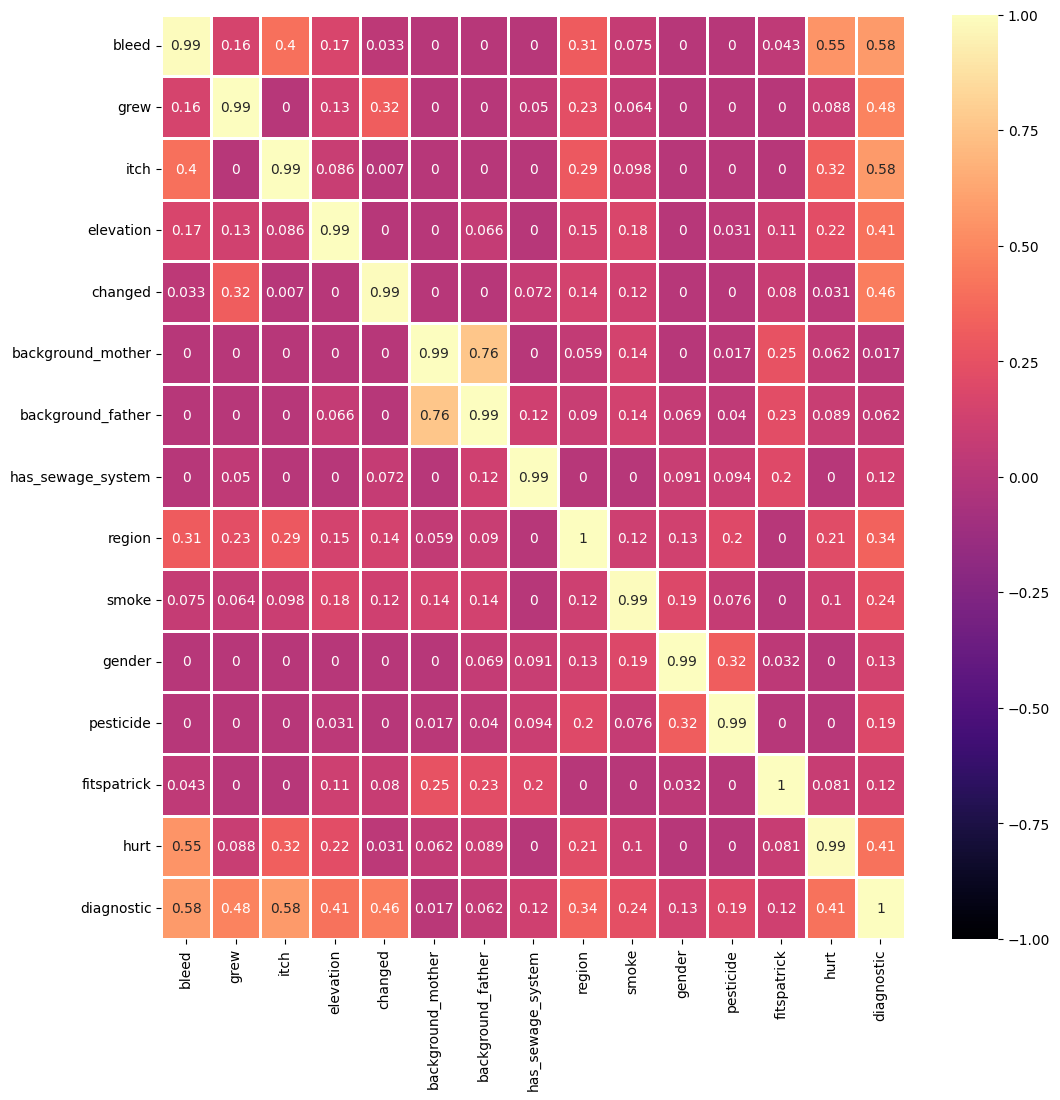

In [260]:
cramer_v_corr = dict(zip(map_cat,[[cramers_corrected_stat(filled_df_map,f1,f2) for f2 in map_cat] for f1 in map_cat]))
plt.figure(figsize=(12,12),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=map_cat),
            cmap='magma',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=-1,
            vmax=1);

In [247]:
X = filled_df.drop(['patient_id', 'lesion_id','img_id', 'biopsed', 'nan_count', "diagnostic"], axis=1)
y = filled_df["diagnostic"]

from sklearn.model_selection import train_test_split
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, random_state=42)

In [248]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X_encoded.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [249]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


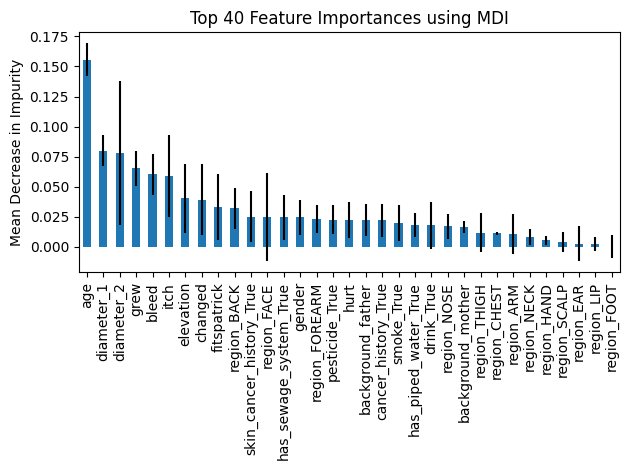

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

top_n = 40
forest_importances = forest_importances[:top_n]
std = std[:top_n]

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Top {} Feature Importances using MDI".format(top_n))
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.show()

In [251]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=40, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

Elapsed time to compute the importances: 3.270 seconds


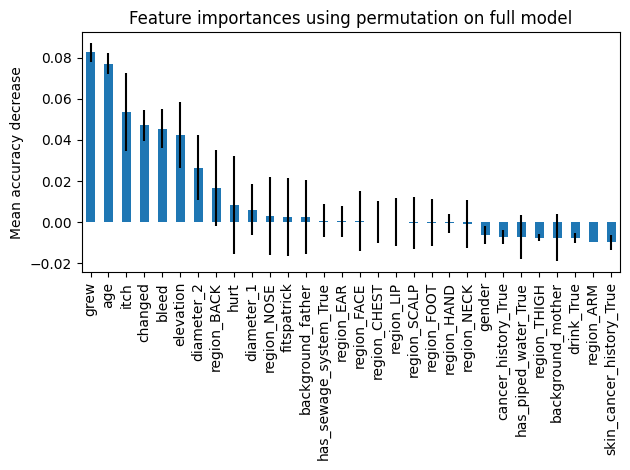

In [252]:
fig, ax = plt.subplots()
top_n = 30
forest_importances = forest_importances[:top_n]
forest_importances.plot.bar(yerr=result.importances_std[:top_n] , ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [315]:
df=filled_df[["age", "bleed", "grew", "itch", "elevation", "changed", "background_mother", "background_father" ,"has_sewage_system", "region", "smoke", 'gender', 'pesticide', "fitspatrick", "hurt", "diagnostic", "img_id"]]
df

,age,bleed,grew,itch,elevation,changed,background_mother,background_father,has_sewage_system,region,smoke,gender,pesticide,fitspatrick,hurt,diagnostic,img_id
0,44.0,False,False,True,False,False,True,False,False,CHEST,False,True,True,2.0,False,ACK,PAT_169_694_411.png
1,53.0,False,False,True,False,False,True,True,False,ARM,False,True,True,1.0,False,ACK,PAT_38_1003_68.png
2,61.0,False,False,False,False,False,True,False,True,ARM,False,False,False,2.0,False,ACK,PAT_65_101_847.png
3,66.0,False,False,True,True,False,True,True,False,ARM,False,False,False,2.0,True,ACK,PAT_69_1053_540.png
4,78.0,True,False,True,True,False,True,True,False,FACE,False,False,True,1.0,True,ACK,PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,71.0,False,False,False,False,False,True,True,False,FOREARM,True,True,True,3.0,False,SCC,PAT_216_331_678.png
368,70.0,False,True,True,True,False,True,True,True,FACE,False,True,False,2.0,False,SCC,PAT_365_751_709.png
369,69.0,False,True,True,True,True,False,False,True,ARM,True,True,False,3.0,False,SCC,PAT_771_1488_562.png
370,62.0,True,True,True,True,False,True,True,True,CHEST,True,False,False,2.0,False,SCC,PAT_319_680_832.png


In [316]:
df

,age,bleed,grew,itch,elevation,changed,background_mother,background_father,has_sewage_system,region,smoke,gender,pesticide,fitspatrick,hurt,diagnostic,img_id
0,44.0,False,False,True,False,False,True,False,False,CHEST,False,True,True,2.0,False,ACK,PAT_169_694_411.png
1,53.0,False,False,True,False,False,True,True,False,ARM,False,True,True,1.0,False,ACK,PAT_38_1003_68.png
2,61.0,False,False,False,False,False,True,False,True,ARM,False,False,False,2.0,False,ACK,PAT_65_101_847.png
3,66.0,False,False,True,True,False,True,True,False,ARM,False,False,False,2.0,True,ACK,PAT_69_1053_540.png
4,78.0,True,False,True,True,False,True,True,False,FACE,False,False,True,1.0,True,ACK,PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,71.0,False,False,False,False,False,True,True,False,FOREARM,True,True,True,3.0,False,SCC,PAT_216_331_678.png
368,70.0,False,True,True,True,False,True,True,True,FACE,False,True,False,2.0,False,SCC,PAT_365_751_709.png
369,69.0,False,True,True,True,True,False,False,True,ARM,True,True,False,3.0,False,SCC,PAT_771_1488_562.png
370,62.0,True,True,True,True,False,True,True,True,CHEST,True,False,False,2.0,False,SCC,PAT_319_680_832.png


In [317]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df['image_path'] = './cancer/all_cancer_images/' + df['img_id'].astype(str)

boolean_columns = ["bleed", "grew", "itch", "elevation", "changed", "smoke", "pesticide", "hurt"]
df[boolean_columns] = df[boolean_columns].replace({False: 0, True: 1})

numerical_columns = ['age']

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

/tmp/ipykernel_4119/1663936291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_path'] = './cancer/all_cancer_images/' + df['img_id'].astype(str)
/tmp/ipykernel_4119/1663936291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[boolean_columns] = df[boolean_columns].replace({False: 0, True: 1})
/tmp/ipykernel_4119/1663936291.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [318]:
df

,age,bleed,grew,itch,elevation,changed,background_mother,background_father,has_sewage_system,region,smoke,gender,pesticide,fitspatrick,hurt,diagnostic,img_id,image_path
0,0.404762,0,0,1,0,0,True,False,False,CHEST,0,True,1,2.0,0,ACK,PAT_169_694_411.png,./cancer/all_cancer_images/PAT_169_694_411.png
1,0.511905,0,0,1,0,0,True,True,False,ARM,0,True,1,1.0,0,ACK,PAT_38_1003_68.png,./cancer/all_cancer_images/PAT_38_1003_68.png
2,0.607143,0,0,0,0,0,True,False,True,ARM,0,False,0,2.0,0,ACK,PAT_65_101_847.png,./cancer/all_cancer_images/PAT_65_101_847.png
3,0.666667,0,0,1,1,0,True,True,False,ARM,0,False,0,2.0,1,ACK,PAT_69_1053_540.png,./cancer/all_cancer_images/PAT_69_1053_540.png
4,0.809524,1,0,1,1,0,True,True,False,FACE,0,False,1,1.0,1,ACK,PAT_260_400_566.png,./cancer/all_cancer_images/PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.726190,0,0,0,0,0,True,True,False,FOREARM,1,True,1,3.0,0,SCC,PAT_216_331_678.png,./cancer/all_cancer_images/PAT_216_331_678.png
368,0.714286,0,1,1,1,0,True,True,True,FACE,0,True,0,2.0,0,SCC,PAT_365_751_709.png,./cancer/all_cancer_images/PAT_365_751_709.png
369,0.702381,0,1,1,1,1,False,False,True,ARM,1,True,0,3.0,0,SCC,PAT_771_1488_562.png,./cancer/all_cancer_images/PAT_771_1488_562.png
370,0.619048,1,1,1,1,0,True,True,True,CHEST,1,False,0,2.0,0,SCC,PAT_319_680_832.png,./cancer/all_cancer_images/PAT_319_680_832.png


In [319]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

transformer = make_column_transformer(
    (OneHotEncoder(), ['region']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed)

encoded_region_columns = transformer.transformers_[0][1].get_feature_names_out(['region'])
remaining_columns = df.columns[~df.columns.isin(['region'])].tolist()

all_columns = encoded_region_columns.tolist() + remaining_columns

transformed_df.columns = all_columns

transformed_df.to_csv("transformed_df.csv", index=False)
transformed_df

,region_ABDOMEN,region_ARM,region_BACK,region_CHEST,region_EAR,region_FACE,region_FOOT,region_FOREARM,region_HAND,region_LIP,...,background_father,has_sewage_system,smoke,gender,pesticide,fitspatrick,hurt,diagnostic,img_id,image_path
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,0,True,1,2.0,0,ACK,PAT_169_694_411.png,./cancer/all_cancer_images/PAT_169_694_411.png
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,0,True,1,1.0,0,ACK,PAT_38_1003_68.png,./cancer/all_cancer_images/PAT_38_1003_68.png
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,0,False,0,2.0,0,ACK,PAT_65_101_847.png,./cancer/all_cancer_images/PAT_65_101_847.png
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,0,False,0,2.0,1,ACK,PAT_69_1053_540.png,./cancer/all_cancer_images/PAT_69_1053_540.png
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,0,False,1,1.0,1,ACK,PAT_260_400_566.png,./cancer/all_cancer_images/PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,True,False,1,True,1,3.0,0,SCC,PAT_216_331_678.png,./cancer/all_cancer_images/PAT_216_331_678.png
368,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,True,0,True,0,2.0,0,SCC,PAT_365_751_709.png,./cancer/all_cancer_images/PAT_365_751_709.png
369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,1,True,0,3.0,0,SCC,PAT_771_1488_562.png,./cancer/all_cancer_images/PAT_771_1488_562.png
370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,1,False,0,2.0,0,SCC,PAT_319_680_832.png,./cancer/all_cancer_images/PAT_319_680_832.png


In [320]:
transformed_df.columns

Index(['region_ABDOMEN', 'region_ARM', 'region_BACK', 'region_CHEST',
       'region_EAR', 'region_FACE', 'region_FOOT', 'region_FOREARM',
       'region_HAND', 'region_LIP', 'region_NECK', 'region_NOSE',
       'region_SCALP', 'region_THIGH', 'age', 'bleed', 'grew', 'itch',
       'elevation', 'changed', 'background_mother', 'background_father',
       'has_sewage_system', 'smoke', 'gender', 'pesticide', 'fitspatrick',
       'hurt', 'diagnostic', 'img_id', 'image_path'],
      dtype='object')

In [213]:
filtered_df_num = ['region_ABDOMEN', 'region_ARM', 'region_BACK', 'region_CHEST',
       'region_EAR', 'region_FACE', 'region_FOOT', 'region_FOREARM',
       'region_HAND', 'region_LIP', 'region_NECK', 'region_NOSE',
       'region_SCALP', 'region_THIGH', 
       'fitspatrick_3.0', 'fitspatrick_4.0', 'fitspatrick_5.0', 'bleed',
       'grew', 'diameter_1', 'diameter_2', 'itch', 'elevation', 'changed',
       'background_mother', 'background_father', 'has_sewage_system', 'smoke',
       'gender', 'pesticide', 'hurt']

In [271]:
df

,age,bleed,grew,itch,elevation,changed,region,smoke,pesticide,hurt,diagnostic,img_id,image_path
0,0.404762,0,0,1,0,0,CHEST,0,1,0,ACK,PAT_169_694_411.png,./cancer/all_cancer_images/PAT_169_694_411.png
1,0.511905,0,0,1,0,0,ARM,0,1,0,ACK,PAT_38_1003_68.png,./cancer/all_cancer_images/PAT_38_1003_68.png
2,0.607143,0,0,0,0,0,ARM,0,0,0,ACK,PAT_65_101_847.png,./cancer/all_cancer_images/PAT_65_101_847.png
3,0.666667,0,0,1,1,0,ARM,0,0,1,ACK,PAT_69_1053_540.png,./cancer/all_cancer_images/PAT_69_1053_540.png
4,0.809524,1,0,1,1,0,FACE,0,1,1,ACK,PAT_260_400_566.png,./cancer/all_cancer_images/PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.726190,0,0,0,0,0,FOREARM,1,1,0,SCC,PAT_216_331_678.png,./cancer/all_cancer_images/PAT_216_331_678.png
368,0.714286,0,1,1,1,0,FACE,0,0,0,SCC,PAT_365_751_709.png,./cancer/all_cancer_images/PAT_365_751_709.png
369,0.702381,0,1,1,1,1,ARM,1,0,0,SCC,PAT_771_1488_562.png,./cancer/all_cancer_images/PAT_771_1488_562.png
370,0.619048,1,1,1,1,0,CHEST,1,0,0,SCC,PAT_319_680_832.png,./cancer/all_cancer_images/PAT_319_680_832.png


In [300]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import make_column_transformer


filtered_df_cat = ["bleed", "grew", "itch", "elevation", "changed", 
                   "region", "smoke", "pesticide", "hurt"]
filtered_df_num = ["age"]

features = filtered_df_cat + filtered_df_num
target_variable = 'diagnostic'
X=transformed_df.drop(target_variable, axis=1)
y=transformed_df[target_variable]

In [301]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_variable], stratify=df[target_variable],
                                                    random_state=42)

In [302]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(transformers=[("num", numerical_transformer, filtered_df_num),
                                               ("cat", categorical_transformer, filtered_df_cat)])

In [303]:
y_train_encoded = categorical_transformer.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = categorical_transformer.transform(y_test.values.reshape(-1, 1))

In [304]:
estimator = Pipeline(steps=[('preprocessor', preprocessor), ('rf', RandomForestRegressor())])

In [305]:
param_grid = {'rf__n_estimators': [200, 300, 500, 1000],
              'rf__max_depth': [5, 10, 20, 50, 100],
              'rf__min_samples_split': [2, 5, 11]}

In [306]:
gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train_encoded.toarray())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['bleed',
                                                                          'grew',
                                                                          'itch',
                                                                          'elevation',
                                                                          'changed',
                                                                          'region',
                                                                          'smoke',
                                                                          'pesticide',
                                                                          'hurt'])])),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, 20, 50, 100],
                         'rf__min_samples_split': [2, 5, 11],
                         'rf__n_estimators': [200, 300, 500, 1000]},
             scoring='r2', verbose=1)

In [307]:
gscv.best_params_

{'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 500}

In [308]:
round(gscv.best_score_,6)

0.392142

In [309]:
best_model = gscv.best_estimator_
training_score = best_model.score(X_train, y_train_encoded.toarray())
test_score = best_model.score(X_test, y_test_encoded.toarray())

In [310]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [311]:
train_r2 = r2_score(y_train_encoded.toarray(), y_train_pred)
print("Training Score:", round(training_score, 6))
test_r2 = r2_score(y_test_encoded.toarray(), y_test_pred)
print("Test Score:", round(test_score, 6))

Training Score: 0.885095
Test Score: 0.448415
